## Dataset Information

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

In [3]:
#let's import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the dataset
sales=pd.read_csv(r'C:\Users\Biju\Desktop\DSE\Data set\Bigmart\Train.csv')


In [5]:
df=sales.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#shape of the dataset
df.shape

(8523, 12)

In [7]:
#data type of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [8]:
#statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#check unique values in dataset
df.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

# Data Preprocessing

In [11]:
#checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#check for catogerical attributes
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat.append(x)
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
cat.remove('Item_Identifier')
cat.remove('Outlet_Identifier')

In [14]:
#let's print the catogerical columns
for x in cat:
    print(x)
    print(df[x].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [15]:
#missing value treatment

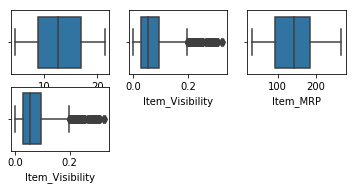

In [16]:
plt.figure(1)
plt.subplot(334)
sns.boxplot(df['Item_Weight'])
plt.subplot(335)
sns.boxplot(df['Item_Visibility'])
plt.subplot(336)
sns.boxplot(df['Item_MRP'])
plt.subplot(337)
sns.boxplot(df['Item_Visibility'])

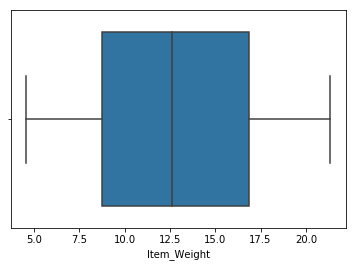

In [17]:
sns.boxplot(df['Item_Weight'])

In [18]:
#As we can see from the boxplot there are no outliers we can fill the missing values of Item_Weight attiribute with the mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [19]:
df['Item_Weight'].isnull().sum()

0

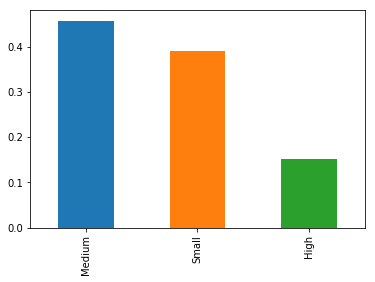

In [20]:
df['Outlet_Size'].value_counts(normalize=True).plot.bar()

In [21]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [22]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [23]:
df['Outlet_Size'].isnull().sum()

0

In [24]:
sum(df['Item_Visibility']==0)

526

In [25]:
# replace zeros with mean
df.loc[:,'Item_Visibility'].replace([0],df['Item_Visibility'].mean(),inplace=True)

In [26]:
sum(df['Item_Visibility']==0)

0

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
#lets combine the attribute 'Item_Fat_Content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# creating new attribute

In [29]:
df['New_item']=df['Item_Identifier'].apply(lambda x: x[:2])
df['New_item'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: New_item, dtype: object

In [30]:
df['New_item']=df['New_item'].map({'FD':'Food','DR':'Drinks','NC':'Non_Consumable'})
df['New_item'].value_counts()

Food              6125
Non_Consumable    1599
Drinks             799
Name: New_item, dtype: int64

In [31]:
#lets create established year of the outlet
df['Estd_year']=2013-df['Outlet_Establishment_Year']
df['Estd_year'].head()

0    14
1     4
2    14
3    15
4    26
Name: Estd_year, dtype: int64

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item,Estd_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_Consumable,26


# Exploratory Data Analysis

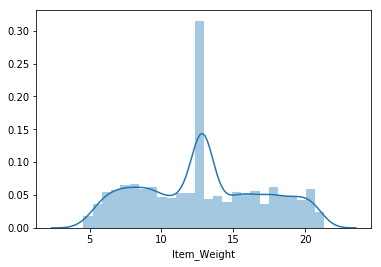

In [33]:
sns.distplot(df['Item_Weight'])

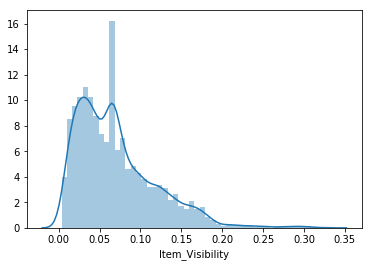

In [34]:
sns.distplot(df['Item_Visibility'])

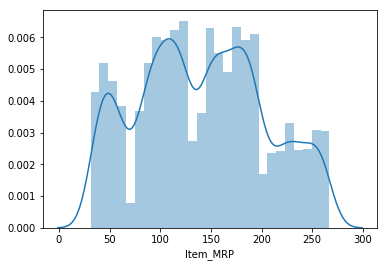

In [35]:
sns.distplot(df['Item_MRP'])

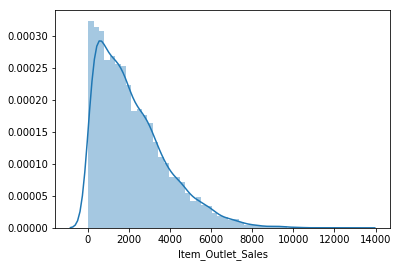

In [36]:
sns.distplot(df['Item_Outlet_Sales'])

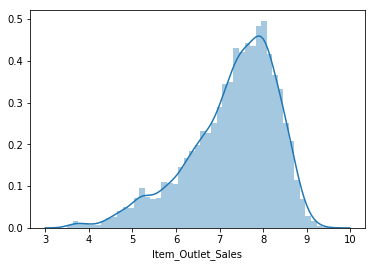

In [37]:
#let's normalize df['Item_Outlet_Sales'] as it is right skewed
df['Item_Outlet_Sales']=np.log(df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'])

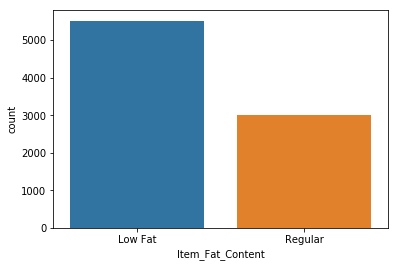

In [38]:
#for catogerical attributes
sns.countplot(df['Item_Fat_Content'])

[Text(0,0,'Dairy'),
 Text(0,0,'Soft Drinks'),
 Text(0,0,'Meat'),
 Text(0,0,'Fruits and Vegetables'),
 Text(0,0,'Household'),
 Text(0,0,'Baking Goods'),
 Text(0,0,'Snack Foods'),
 Text(0,0,'Frozen Foods'),
 Text(0,0,'Breakfast'),
 Text(0,0,'Health and Hygiene'),
 Text(0,0,'Hard Drinks'),
 Text(0,0,'Canned'),
 Text(0,0,'Breads'),
 Text(0,0,'Starchy Foods'),
 Text(0,0,'Others'),
 Text(0,0,'Seafood')]

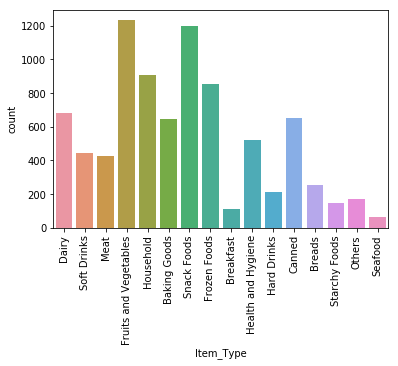

In [39]:
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

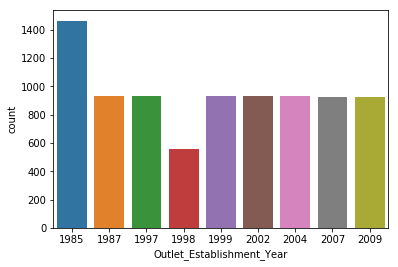

In [40]:
sns.countplot(df['Outlet_Establishment_Year'])

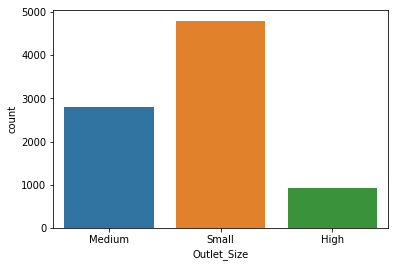

In [41]:
sns.countplot(df['Outlet_Size'])

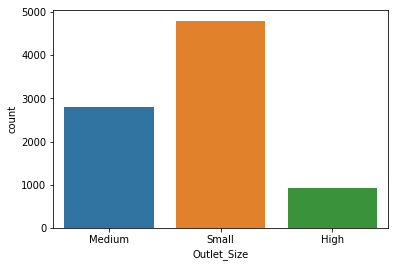

In [42]:
sns.countplot(df['Outlet_Size'])

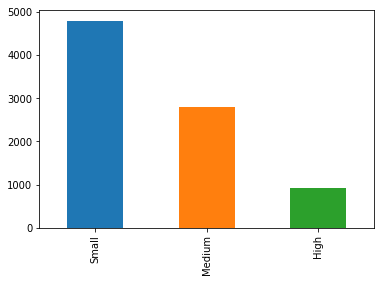

In [43]:
df['Outlet_Size'].value_counts().plot.bar()

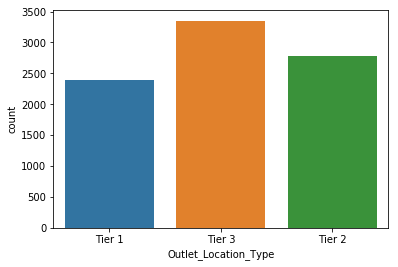

In [44]:
sns.countplot(df['Outlet_Location_Type'])

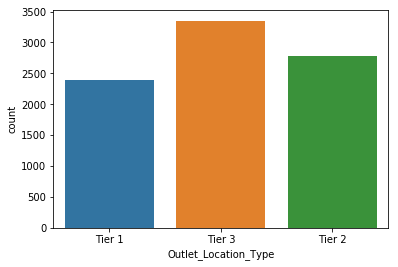

In [45]:
sns.countplot(df['Outlet_Location_Type'])

# correlation matrix


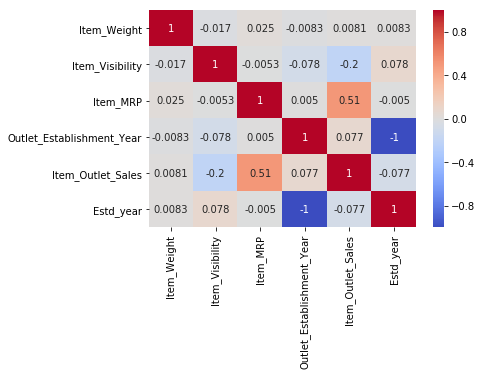

In [46]:
corr=df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

# Label encoding

In [63]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Type'] = le.fit_transform(df['Item_Type'])


In [48]:
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item,Estd_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,8.225540,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,6.094524,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,7.648392,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,6.596300,Food,15
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,6.902446,Non_Consumable,26


# one hot encoding

In [49]:
df=pd.get_dummies(df,columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_item'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Estd_year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_item_Drinks,New_item_Food,New_item_Non_Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,8.225540,14,1,0,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,6.094524,4,0,1,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,7.648392,14,1,0,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,6.596300,15,0,1,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,6.902446,26,1,0,...,0,0,1,0,1,0,0,0,0,1


#  Train-Test split

In [64]:
x=df.drop(columns=[ 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

# Model Training

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =1)

In [57]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [67]:
LR=LinearRegression()
LR.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

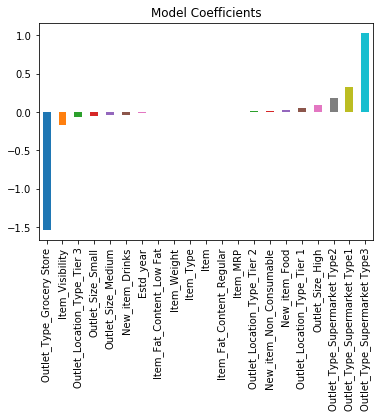

In [69]:
coef = pd.Series(LR.coef_, x_train.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [75]:
print('score:',LR.score(x_test, y_test))
y_pred=LR.predict(x_test)
print("MSE:",mean_squared_error(y_test,y_pred))

score: 0.727567315758125
MSE: 0.29003879364410723


# cross-validation

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge

In [81]:
def train(Model,x_train,y_train):
    #training the model
    Model.fit(x_train,y_train)
    #prediction
    y_pred=Model.predict(x_test)
    #cross_validation
    scores = cross_val_score(Model, x_train, y_train, cv=5)
    cv_score = np.abs(np.mean(scores))
    
    print('score:',Model.score(x_test, y_test))
    print("MSE:",mean_squared_error(y_test,y_pred))
    print('CV_score:',scores)
    print('CV_score:',cv_score)


score: 0.727567315758125
MSE: 0.29003879364410723
CV_score: [0.70901634 0.71234101 0.72831606 0.71535239 0.70615707]
CV_score: 0.7142365717258959


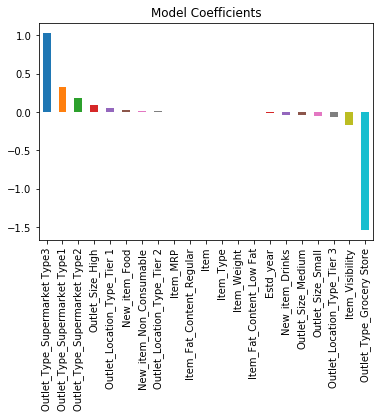

In [90]:
Model=LinearRegression()
train(Model,x_train,y_train)
coef = pd.Series(Model.coef_, x_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Model Coefficients")

score: 0.26578575671961313
MSE: 0.7816632354152475
CV_score: [0.21829091 0.26723515 0.25469135 0.26025586 0.27958388]
CV_score: 0.2560114293585996


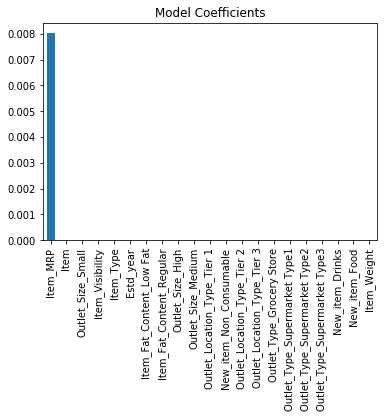

In [91]:
Model=Lasso()
train(Model,x_train,y_train)
coef = pd.Series(Model.coef_, x_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Model Coefficients")


score: 0.7275566667384951
MSE: 0.290050130862384
CV_score: [0.7089589  0.7124454  0.72832094 0.71545958 0.70612932]
CV_score: 0.7142628305348954


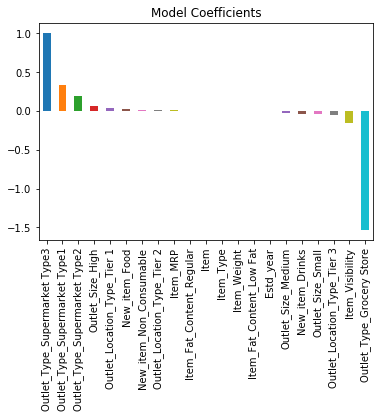

In [92]:
Model=Ridge()
train(Model,x_train,y_train)
coef = pd.Series(Model.coef_, x_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Model Coefficients")

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

score: 0.47423093087258217
MSE: 0.5597471792691096
CV_score: [0.47189989 0.46385519 0.45320909 0.38567895 0.44545147]
CV_score: 0.4440189172168184


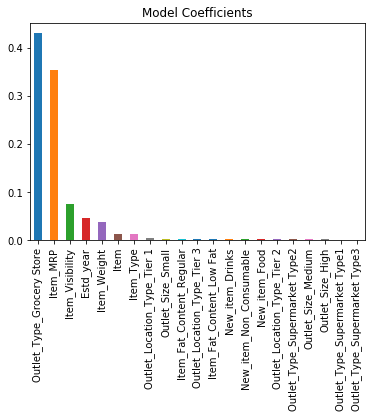

In [94]:
Model=DecisionTreeRegressor()
train(Model,x_train,y_train)
coef = pd.Series(Model.feature_importances_, x_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Model Coefficients")

score: 0.6940383924774144
MSE: 0.325734541706
CV_score: [0.66814597 0.66770268 0.67652807 0.68088125 0.6723557 ]
CV_score: 0.6731227345774574


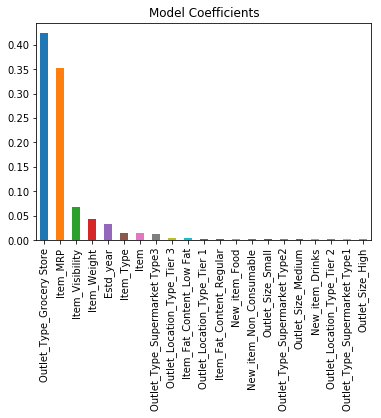

In [95]:
Model=RandomForestRegressor()
train(Model,x_train,y_train)
coef = pd.Series(Model.feature_importances_, x_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Model Coefficients")